In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"]="4"
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

In [50]:
path = r"C:\Users\buitr\Desktop\Data Analyst\Data Analytics Immersion\A6"

In [52]:
df_all_years = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'all_years_cleaned.csv'))

In [54]:
df_all_years.head()

,Country,Year,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [56]:
df = df_all_years.drop(['Country', 'Year'], axis=1)

In [58]:
# define the range of potential clusters in the data
num_cl = range(1,10)

# defines k-means clusters in the range we assigned aboved
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [60]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [62]:
print(score)

[-1294.008543199032, -489.064200604376, -306.9851354464554, -237.68685375506502, -194.86511550233072, -177.2793127794038, -163.44480437212385, -153.03343185438987, -146.68269518685014]


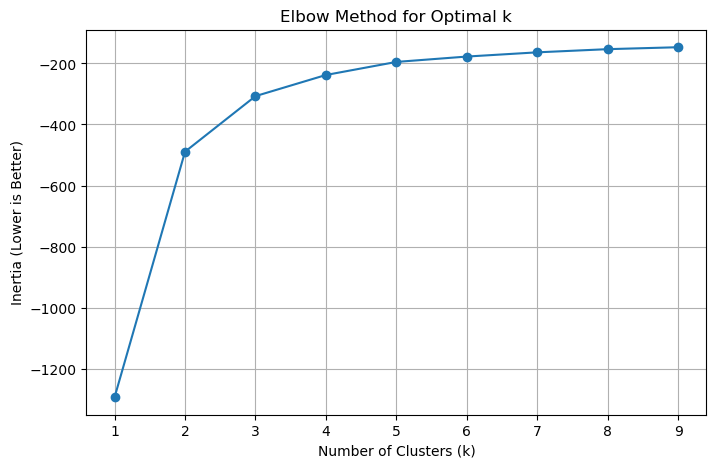

In [64]:
# Plot the scores on a chart to find the elbow
plt.figure(figsize=(8, 5))
elbow_plot = plt.plot(num_cl, score, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Lower is Better)')
plt.grid(True)
plt.savefig(os.path.join(path,'04 Analysis', 'elbow_plot.png'), dpi=300, bbox_inches='tight')

plt.show()

In [65]:
# Create the k-means object
kmeans = KMeans(n_clusters=3)

In [68]:
kmeans.fit(df)

KMeans(n_clusters=3)

In [70]:
df['clusters']=kmeans.fit_predict(df)

In [72]:
df.head()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,1
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1


In [74]:
df['clusters'].value_counts()

clusters
2    314
0    279
1    189
Name: count, dtype: int64

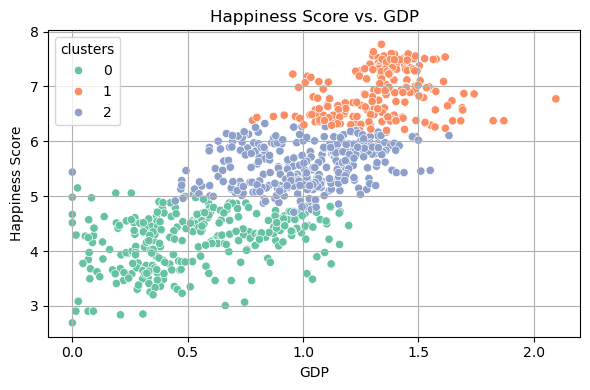

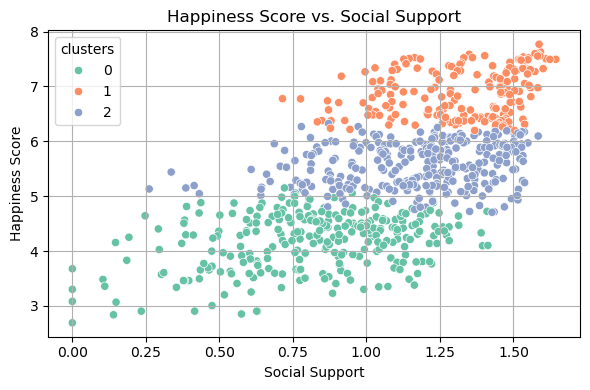

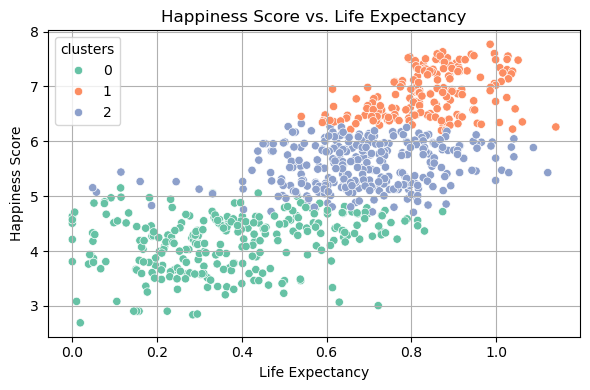

In [81]:
# Visualize the clusters
features = ['GDP', 'Social Support', 'Life Expectancy']

for feature in features:
    plt.figure(figsize=(6, 4))
    scatter_plot_clusters = sns.scatterplot(data=df, x=feature, y='Happiness Score', hue='clusters', palette='Set2')
    plt.title(f'Happiness Score vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Happiness Score')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(path, '04 Analysis', f'scatter_plot_clusters_{feature}.png'), dpi=300, bbox_inches='tight')
    plt.show()


# Do the Clusters Make Sense?
Yes the clusters actually tell a pretty clear story:
- The orange group represents high-performing countries: they score well in both GDP and social support, and not surprisingly, they have the highest happiness levels.
- The purple group is somewhere in the middle — decent GDP and social ties, and their happiness is also moderate.
- The green group struggles in both economic and social dimensions, and happiness scores are clearly lower.

This aligns well with the idea that both money and human connection play big roles in how satisfied people are. The split feels logical, not random.

No big outliers or surprises so far. but it would still be interesting to explore why some countries fall into the purple group rather than orange. Maybe some other factors are at play (e.g., culture, politics, history). Might be worth digging into that later.

In [84]:
# descriptive analysis
columns_to_summarize = ['Happiness Score', 'GDP', 'Social Support', 'Life Expectancy', 'Freedom	Generosity','Trust']

# Define a mapping: cluster number → color
cluster_labels = {0: 'Green', 1: 'Orange', 2: 'Purple'}
df['cluster_label'] = df['clusters'].map(cluster_labels)

# Group by the color labels and describe all numerical columns
cluster_summary = df.groupby('cluster_label').describe()

pd.set_option('display.max_columns', None) 
cluster_summary

Happiness Score                                             \
                        count      mean       std    min      25%    50%   
cluster_label                                                              
Green                   279.0  4.170280  0.504767  2.693  3.79850  4.286   
Orange                  189.0  6.874074  0.424381  6.198  6.47400  6.867   
Purple                  314.0  5.553134  0.393562  4.707  5.21125  5.542   

                               GDP                                      \
                 75%    max  count      mean       std    min      25%   
cluster_label                                                            
Green          4.550  5.151  279.0  0.520218  0.295609  0.000  0.30800   
Orange         7.278  7.769  189.0  1.336719  0.197420  0.781  1.23011   
Purple         5.890  6.324  314.0  1.014549  0.238211  0.000  0.84361   

                                            Social Support            \
                    50%       75%       max          count      mean   
cluster_label                                                          
Green          0.472000  0.744545  1.198210          279.0  0.814543   
Orange         1.351000  1.450380  2.096000          189.0  1.316925   
Purple         1.027835  1.189047  1.632952          314.0  1.169256   

                                                                    \
                    std      min      25%     50%       75%    max   
cluster_label                                                        
Green          0.296428  0.00000  0.62718  0.8480  1.033500  1.413   
Orange         0.206106  0.71460  1.16594  1.3570  1.481349  1.644   
Purple         0.250464  0.26135  1.00415  1.2115  1.364000  1.584   

              Life Expectancy                                                  \
                        count      mean       std      min      25%       50%   
cluster_label                                                                   
Green                   279.0  0.376518  0.198360  0.00000  0.23301  0.358740   
Orange                  189.0  0.838540  0.110927  0.54024  0.77758  0.843887   
Purple                  314.0  0.685912  0.160039  0.04800  0.59779  0.684500   

                               Freedom                                         \
                    75%    max   count      mean       std      min       25%   
cluster_label                                                                   
Green          0.530540  0.874   279.0  0.336890  0.153053  0.00000  0.241000   
Orange         0.905630  1.141   189.0  0.532385  0.095335  0.21006  0.468230   
Purple         0.790318  1.122   314.0  0.404013  0.134953  0.05822  0.296177   

                                        Generosity                             \
                   50%       75%    max      count      mean       std    min   
cluster_label                                                                   
Green          0.35500  0.440530  0.696      279.0  0.222607  0.121294  0.025   
Orange         0.55211  0.603650  0.686      189.0  0.270890  0.124866  0.046   
Purple         0.42450  0.505324  0.724      314.0  0.183506  0.109550  0.000   

                                                      Trust            \
                    25%      50%       75%       max  count      mean   
cluster_label                                                           
Green          0.152875  0.20363  0.259490  0.838075  279.0  0.106427   
Orange         0.162350  0.26200  0.345966  0.586960  189.0  0.219780   
Purple         0.102430  0.17204  0.245750  0.611705  314.0  0.085495   

                                                                     clusters  \
                    std      min      25%     50%       75%      max    count   
cluster_label                                                                   
Green          0.077441  0.00615  0.06163  0.0880  0.125510  0.55191    279.0   
Orange         0.131908  0.01400  

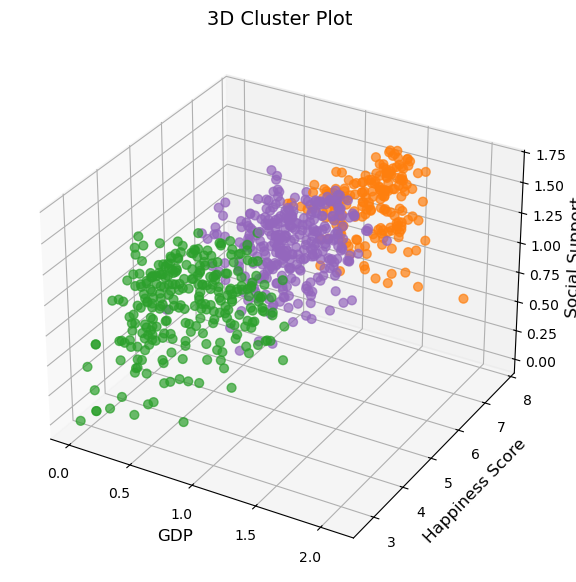

In [86]:
# 3D visualization

# Define a color map that matches  cluster labels
color_map = {
    'Green': '#2ca02c',   # typical green
    'Orange': '#ff7f0e',  # typical orange
    'Purple': '#9467bd'   # typical purple
}

# Map color labels to actual color codes
df['color'] = df['cluster_label'].map(color_map)

# Create 3D plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['GDP'],
    df['Happiness Score'],
    df['Social Support'],
    c=df['color'],      # use mapped color
    s=40,
    alpha=0.7
)

# Labels and title
ax.set_xlabel('GDP', fontsize=12)
ax.set_ylabel('Happiness Score', fontsize=12)
ax.set_zlabel('Social Support', fontsize=12)
ax.set_title('3D Cluster Plot', fontsize=14)
plt.savefig(os.path.join(path,'04 Analysis', '3D.png'), dpi=300, bbox_inches='tight')

plt.show()

# Cluster summary (Mean & Median)
### Orange Cluster
Highest happiness score (mean 6.85 / median 6.84).
Also has the highest GDP and social support. That makes sense, with more money and more connection people have more life satisfaction.

### Purple Cluster
Middle of the pack (mean happiness 5.54 / median 5.53).
GDP and support also in the middle, so maybe people are doing okay but not thriving.

### Green Cluster
Lowest happiness (mean 4.17 / median 4.29), and also the lowest GDP and social support.
Clear pattern here with lower resources seem tied to lower well-being.

Overall, the results match the idea that happiness is strongly linked to both economic wealth and social connection. No big surprises, but useful to see the clusters confirm it.

This is helpful for the next steps — for example, we can:

Explore what makes each group unique and dig into why certain countries don’t follow the usual pattern.
Use these clusters to build better prediction models, maybe even tailor them to specific types of countries.
Start thinking in terms of types of wellbeing and not just rich vs. poor, but maybe "connected but not rich" or "wealthy but low trust."
Come up with new questions. For example, why are some high-GDP countries not as happy as expected?
It’s a good foundation for the next round of analysis or even for storytelling with data.